In [17]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import sklearn.utils
from sklearn.decomposition import PCA
from pca import pca

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier as mlp

In [2]:
data = pd.read_csv('mbti_1.csv')
mbti = {'I':'Introversion', 'E':'Extroversion', 'N':'Intuition', 
        'S':'Sensing', 'T':'Thinking', 'F': 'Feeling', 
        'J':'Judging', 'P': 'Perceiving'}

In [3]:
def sentence_and_words(text):
    cachedStopWords = stopwords.words("english")
    
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    words = ""
    line = 0
    total_words = 0
    
    for item in text.split('|||'):
        sentence = item.strip()
        sentence = re.sub("[^a-zA-Z]", " ", sentence)
        sentence = re.sub(' +', ' ', sentence).lower()
        
        if sentence and len(sentence) > 1:
            line += 1
            
            new_words = [stemmer.stem(lemmatizer.lemmatize(w.strip())) for w in sentence.split(' ') 
                         if w.strip() not in cachedStopWords and len(w.strip()) > 1]
            
            total_words += len(new_words)
            words += " ".join([w for w in new_words])
            #print(new_words)
    return line, total_words, words

In [4]:
data['sentences'] = 0
data['total_words'] = 0
data['total_urls'] = 0
data['words'] = 0

total_rows = len(data)

for i in range(total_rows):
    mbti_type = data.iloc[i]['type']
    text = data.iloc[i]['posts']
    
    urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',  text)
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', text)
    
    total_sentence, total_words, words = sentence_and_words(text)
    #print(words)
    data.loc[data.index == i, 'sentences'] = total_sentence
    data.loc[data.index == i, 'total_words'] = total_words
    data.loc[data.index == i, 'total_urls'] = len(urls)
    data.loc[data.index == i, 'words'] = words

In [9]:
np.random.seed(1)
tfidf_pca = CountVectorizer(ngram_range=(1, 1), stop_words='english', lowercase = True, max_features = 5000)

### Learn the vocabulary dictionary and return term-document matrix.

In [10]:
count_matrix = tfidf_pca.fit_transform(data['words'])

### Transform a count matrix to a normalized tf or tf-idf representation

In [12]:
tidif_normallizer = TfidfTransformer()
count_matrix = tidif_normallizer.fit_transform(count_matrix).toarray()

In [ ]:
# run PCA
new_data, variances, eigenvectors = pca(count_matrix)

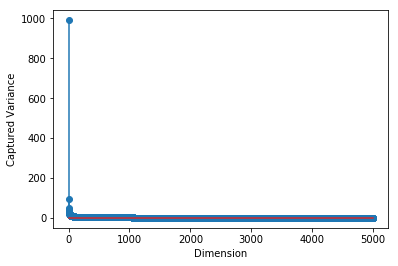

In [36]:
plt.figure()
plt.stem(variances.ravel())
plt.xlabel('Dimension')
plt.ylabel('Captured Variance')
plt.savefig('Captured_Variance.png', dpi=100)
plt.show()

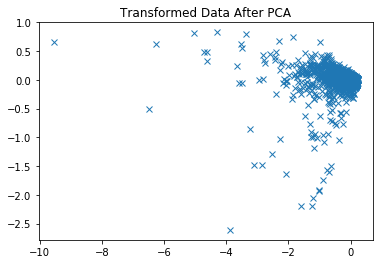

In [35]:
plt.figure()
plt.plot(new_data[0,:], new_data[1,:], 'x')
plt.title('Transformed Data After PCA')
plt.savefig('Transformed_data_after_PCA.png', dpi=100)
plt.show()

In [37]:
def doPCA(mydata):
    pca_model = PCA(n_components = 2)
    pca_model.fit(mydata)
    return pca_model

pca_model = doPCA(count_matrix)
print(pca_model.explained_variance_ratio_)

[ 0.01268084  0.01058704]
